In [53]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets, transforms
import helper

In [33]:
transForm = transforms.Compose([transforms.Resize(255),
                    transforms.RandomCrop(245),
                   transforms.ColorJitter(),
                   transforms.RandomHorizontalFlip(),
                   transforms.RandomRotation(10),
                   transforms.ToTensor()])
#transForm.transforms[:-1]

In [34]:
dataset = datasets.ImageFolder('/home/santhosh/testProjects/cats_dogs/train/', transform=transForm)

In [35]:
dataset

Dataset ImageFolder
    Number of datapoints: 25000
    Root Location: /home/santhosh/testProjects/cats_dogs/train/
    Transforms (if any): Compose(
                             Resize(size=255, interpolation=PIL.Image.BILINEAR)
                             RandomCrop(size=(245, 245), padding=0)
                             ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)
                             RandomHorizontalFlip(p=0.5)
                             RandomRotation(degrees=(-10, 10), resample=False, expand=False)
                             ToTensor()
                         )
    Target Transforms (if any): None

In [36]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [37]:
img, lbl = next(iter(dataloader))

In [38]:
img.shape

torch.Size([32, 3, 245, 245])

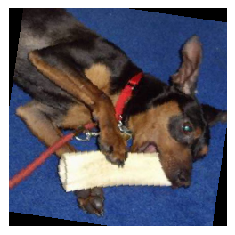

In [45]:
helper.imshow(img[11], normalize=False)

In [56]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])


In [57]:
data_dir = '/home/santhosh/testProjects/cats_dogs'
train_dir = 'train'
test_dir = 'test'

train_data = datasets.ImageFolder(f'{data_dir}/{train_dir}/',transform=train_transforms)
test_data = datasets.ImageFolder(f'{data_dir}/{test_dir}/', transform=test_transforms)

In [58]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

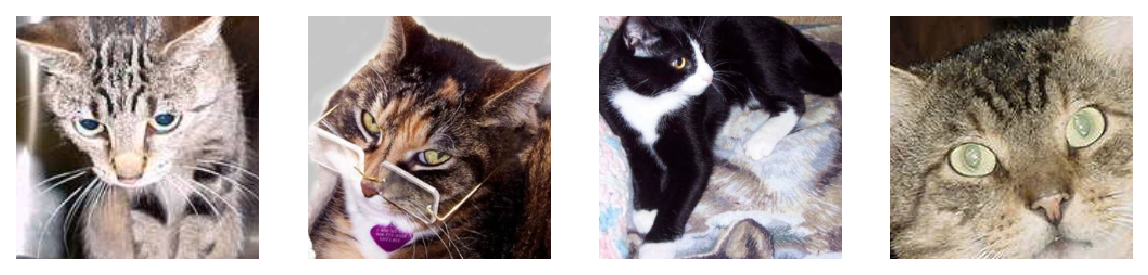

In [60]:
# change this to the trainloader or testloader 
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)